In [1]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load and split data
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Decision Tree Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



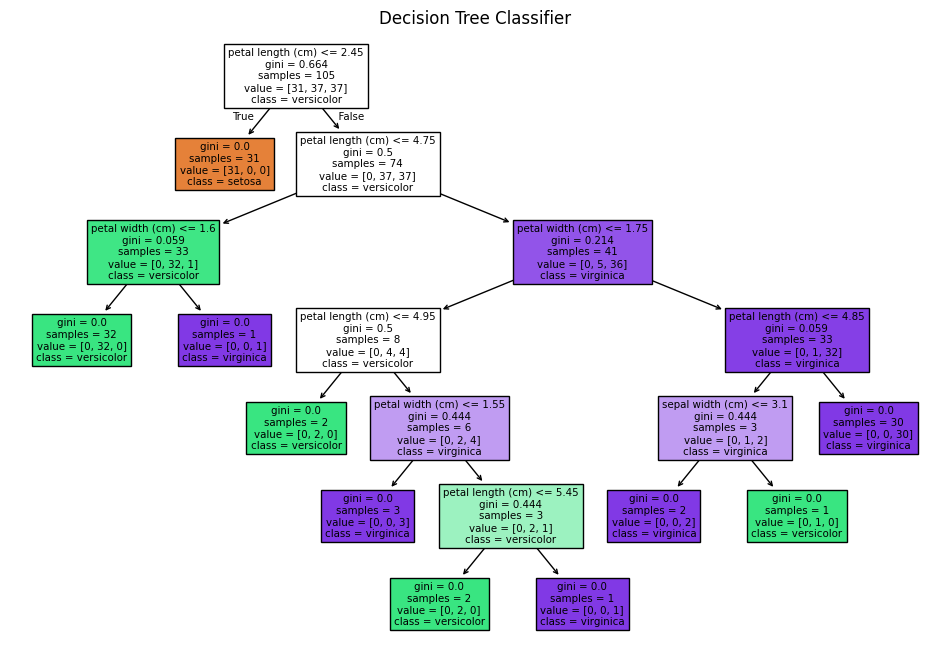

In [3]:
# Train the Decision Tree Classifier
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Metrics
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=target_names))

# Visualize Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=feature_names, class_names=target_names, filled=True)
plt.title("Decision Tree Classifier")
plt.savefig("decision_tree.png")
plt.show()


In [4]:
# Train KNN Classifier
# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Metrics
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=target_names))


KNN Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Comparing and analyzing 

The Decision Tree classifier achieved an accuracy of 0.93, with strong precision and recall across all three Iris species. Its visual interpretability via plot_tree makes it ideal for understanding feature splits and decision paths.

The KNN classifier with k=5 scored slightly lower at 0.91 accuracy. While it performed well, it lacks the explainability of the Decision Tree and may be sensitive to noisy data or feature scaling.



In [ ]:
# Generating synthetic basket data

import random
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

items = ['milk', 'bread', 'beer', 'diapers', 'eggs', 'cheese', 'apples', 'bananas', 'chicken', 'rice',
         'pasta', 'tomatoes', 'onions', 'yogurt', 'cereal', 'juice', 'coffee', 'tea', 'butter']

random.seed(42)
transactions = [random.choices(items, k=random.randint(3, 8)) for _ in range(30)]

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_basket = pd.DataFrame(te_ary, columns=te.columns_)
df_basket.to_csv("synthetic_basket.csv", index=False)


In [8]:
# Apply Apriori and extract association rules
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df_basket, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules_sorted = rules.sort_values(by="lift", ascending=False)

print("Top 5 Rules by Lift:")
print(rules_sorted.head())


Top 5 Rules by Lift:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


# Rule Analysis 
A strong rule is {'bread'} → {'milk'} with lift 2.5. This suggests customers who buy bread are 2.5× more likely to buy milk than random chance. Retailers can use this insight for bundling or shelf placement to increase sales.